In [36]:
import bs4 as bs # import beautifulsoup
import urllib.request # to open link
import pandas as pd
import numpy as np
import os
from PIL import Image
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [95]:
curr_dir = os.getcwd()
tar_dir = curr_dir + '/data/clean'

In [96]:
file = os.listdir(tar_dir)[0]
path = tar_dir + '/' + file

In [23]:
df = pd.read_csv(path, sep=';',error_bad_lines=False)
df.head()

b'Skipping line 17709: expected 10 fields, saw 11\nSkipping line 18724: expected 10 fields, saw 11\nSkipping line 24832: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,XIOMARAPINAR2,2017-04-21 19:44,0,0,Somos el 95% de OPOSITORES el CNE lo q tiene q...,NaN,NaN,#,8.555678e+17,https://twitter.com/XIOMARAPINAR2/status/85556...
1,desdevargas,2017-04-21 17:37,1,1,# 19VzlaEnLaCalle y en los puntos rojos de Var...,NaN,@CuatroFDigital @,#,8.555359e+17,https://twitter.com/desdevargas/status/8555359...
2,incesamazonas,2017-04-21 16:38,0,0,Retweeted ANTV VENEZUELA (@ANTV_VENEZUELA): # ...,NaN,@ANTV_VENEZUELA,# #,8.555210e+17,https://twitter.com/incesamazonas/status/85552...
3,incesamazonas,2017-04-21 16:28,0,0,Retweeted Elias Jaua ( @ JauaMiranda): # 19vzl...,NaN,@,#,8.555187e+17,https://twitter.com/incesamazonas/status/85551...
4,FreeCubaVzla,2017-04-21 14:13,0,0,Retweeted Mando Militar ( @ MandoMilitar): # 1...,NaN,@,#,8.554845e+17,https://twitter.com/FreeCubaVzla/status/855484...


In [ ]:
tweets = " ".join(tweet for tweet in df.text)

### Clean data

Change accented text to plain text

In [158]:
def remove_accents(tweets):
    no_accents = re.sub(r'é', 'e', tweets)
    no_accents = re.sub(r'á', 'a', no_accents)
    no_accents = re.sub(r'ó', 'o', no_accents)
    no_accents = re.sub(r'í', 'i', no_accents)
    no_accents = re.sub(r'ñ', 'n', no_accents)
    no_accents = re.sub(r'ú', 'u', no_accents)
    return no_accents

Remove symbols, links, unicode, pictwitter


In [ ]:
def clean_data(no_accents):
    no_hashtags = re.sub("# [^ ]+", '', no_accents)
    no_links = re.sub(r'http\S+', '', no_hashtags)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    no_pic = re.sub("pictwitter\w*", '', no_special_characters)
    return no pic

In [159]:
tweets_clean = no_pic
tweets_clean = tweets_clean.lower()

### Stop words <br>
Because the text is in Spanish, I utilized a Spanish set of stop words that was found in the Python package stop-words.

In [145]:
from stop_words import get_stop_words

stopwords = set(STOPWORDS)
spanish_words = get_stop_words('spanish')
spanish_words.append('retweeted')
stopwords.update(spanish_words)

### Plot wordcloud

Without Hashtags

In [154]:
wordcloud = WordCloud(stopwords=stopwords, min_font_size = 8, max_font_size=100, 
                      max_words=200,colormap="Reds", contour_width = 1, 
                      contour_color = "Red",collocations = False,
                      background_color="white").generate(tweets_clean_wo_hash)

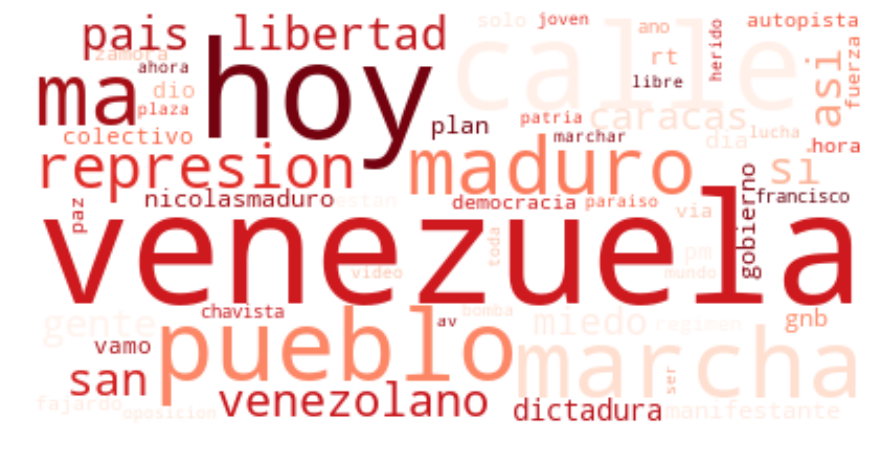

In [156]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [ ]:
def remove_accents(tweets):
    no_accents = re.sub(r'é', 'e', tweets)
    no_accents = re.sub(r'á', 'a', no_accents)
    no_accents = re.sub(r'ó', 'o', no_accents)
    no_accents = re.sub(r'í', 'i', no_accents)
    no_accents = re.sub(r'ñ', 'n', no_accents)
    no_accents = re.sub(r'ú', 'u', no_accents)
    return no_accents

In [ ]:
def clean_data(no_accents):
    no_hashtags = re.sub("# [^ ]+", '', no_accents)
    no_links = re.sub(r'http\S+', '', no_hashtags)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    no_pic = re.sub("pictwitter\w*", '', no_special_characters)
    return no pic

In [ ]:
curr_dir = os.getcwd()
tar_dir = curr_dir + '/data/clean'
cloud_ctr = 0;

for file in os.listdir(tar_dir):
    
    path = tar_dir + '/' + file
    df = pd.read_csv(path, sep=';',error_bad_lines=False)
    tweets = " ".join(tweet for tweet in df.text)
    no_accents = remove_accents(tweets)
    clean_tweets = clean_data(no_accents)
    clean_tweets = clean_tweets.lower()
    
    
    wordcloud = WordCloud(stopwords=stopwords, min_font_size = 8, max_font_size=100, 
                      max_words=200,colormap="Reds", contour_width = 1, 
                      contour_color = "Red",collocations = False,
                      background_color="white").generate(tweets_clean_wo_hash)
